In [18]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
from time import time
from numba import njit

In [51]:

def f(t:float, y:float, c:float)->float:
    return c*y

def df(t:float, y:float, c:float)->float:
  return c

In [37]:

def explicit_euler(a:float, b:float, N:int, f:Callable[[float, float], float], y0:float)->np.ndarray:
    h = (b-a)/N
    t = a
    sol = np.zeros(N)
    sol[0] = y0
    for i in range(N-1):
        sol[i+1] = sol[i]+h*f(t, sol[i])
        t+=h
    return sol


In [36]:
def newton(f:Callable, df:Callable, x0, *args, tol = np.finfo(float).eps):
    x = x0
    h = args[0]
    t = args[1]
    err = 1.0
    while(err>tol):
        x_new = x- (x-x0-h*f(t,x))/(1-h*df(t,x))
        err= x_new-x
        x = x_new
    return x


def implicit_euler(a:float, b:float, N:int, f:Callable[[float, float], float],
                   df:Callable[[float, float], float], y0:float)->np.ndarray:
    h = (b-a)/N
    t = a
    sol = np.zeros(N)
    sol[0] = y0
    for i in range(N-1):
        sol[i+1] = newton(f, df, sol[i], h, t) #sol[i]+h*f(t, sol[i])
        t+=h
    return sol

In [45]:
sol=explicit_euler(0,2,1000,lambda t,x:test_func(t,x,5),1)

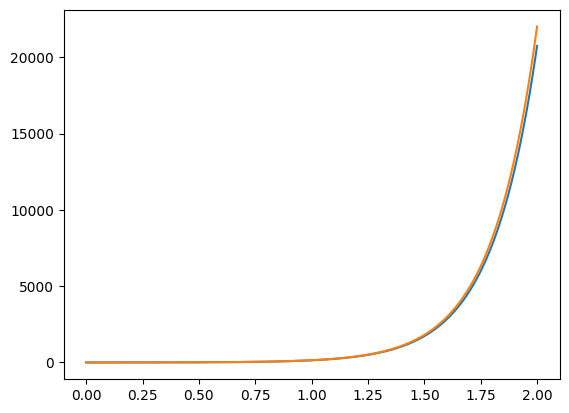

In [46]:
x = np.linspace(0,2,1000)
plt.plot(x, sol)
plt.plot(x, np.exp(5*x))


In [47]:
sol2=implicit_euler(0,2,1000,
                    lambda t,x:test_func(t,x,5),
                    lambda t,x:test_dfunc(t,x,5),
                    1)

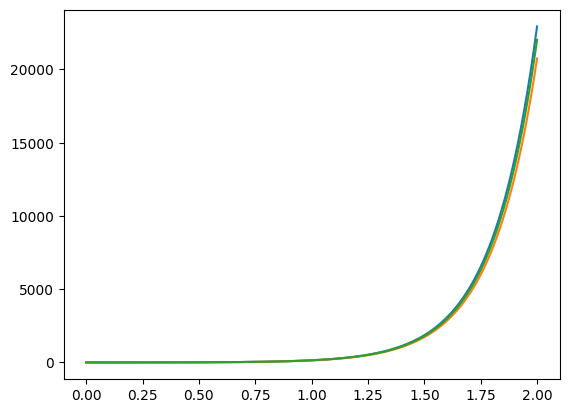

In [50]:
x = np.linspace(0,2,1000)
plt.plot(x, sol2)
plt.plot(x, sol)
plt.plot(x, np.exp(5*x))

In [69]:
C = [1,10,-1,-10]
function_list = [lambda t,x:f(t,x ,c) for c in C]
dfunction_list = [lambda t,x:df(t,x ,c) for c in C]
name = [str(c) for c in C]
TRUE_SOL = [np.exp(c) for c in C]
steps = [2** i for i in range(1,11)]

In [70]:
Imp = np.zeros((len(steps), len(C)))
Exp = np.zeros((len(steps), len(C)))

for i,step in enumerate(steps):
    for j, func in enumerate(function_list):
        imp_sol = implicit_euler(0,1,step, function_list[j],
                    dfunction_list[j], 1)
        exp_sol = explicit_euler(0,1, step, function_list[j], 1)
        Imp[i, j] = np.abs(imp_sol[-1]-TRUE_SOL[j])
        Exp[i, j] = np.abs(exp_sol[-1]-TRUE_SOL[j])



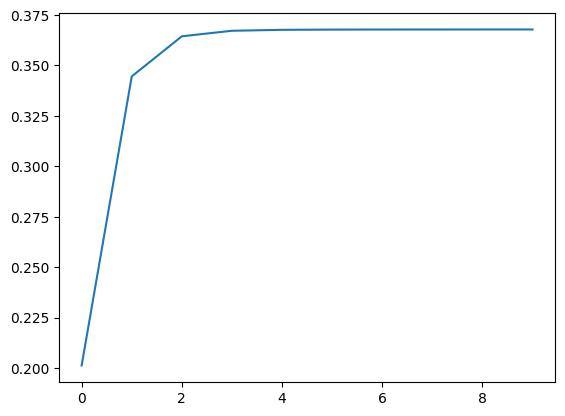

In [76]:
plt.plot(Imp[:,2])